In [1]:
#BRUTE FORCE MATCHING WITH SIFT DESCRIPTORS

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
reeses = cv2.imread('E:/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)
cereals = cv2.imread('E:/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

In [53]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize =(20,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
                     

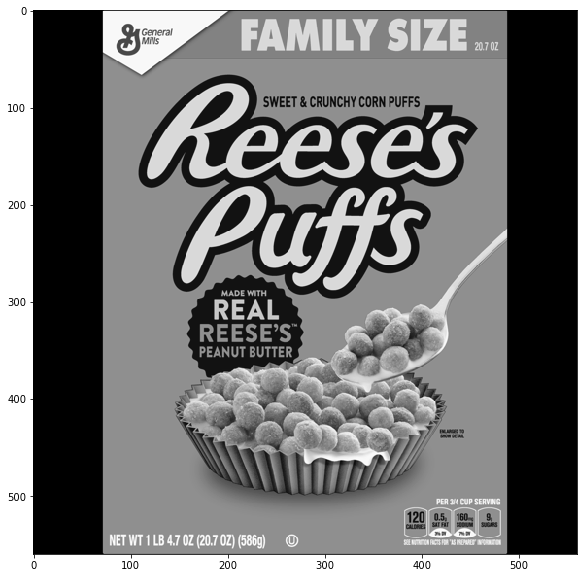

In [20]:
display(reeses)

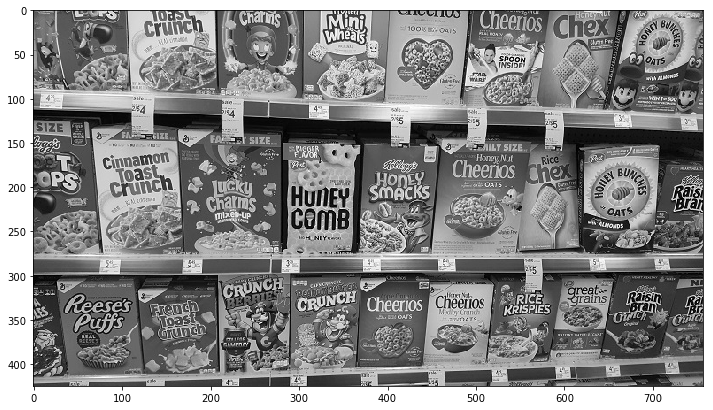

In [21]:
display(cereals)

In [24]:
sift = cv2.xfeatures2d.SIFT_create()

In [28]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [33]:
bf = cv2.BFMatcher()

In [36]:
matches = bf.knnMatch(des1,des2,k=2)

In [38]:
matches[:25]

[[<DMatch 000001BC61D49C50>, <DMatch 000001BC61AF9710>],
 [<DMatch 000001BC61AF9F10>, <DMatch 000001BC61AF9D90>],
 [<DMatch 000001BC61AF9E70>, <DMatch 000001BC61AF9F90>],
 [<DMatch 000001BC61AF9FB0>, <DMatch 000001BC61AF9DF0>],
 [<DMatch 000001BC61AF9E30>, <DMatch 000001BC61AF9EF0>],
 [<DMatch 000001BC61AF9F30>, <DMatch 000001BC61AF9870>],
 [<DMatch 000001BC61AF9F70>, <DMatch 000001BC61AF9EB0>],
 [<DMatch 000001BC61AF9FD0>, <DMatch 000001BC61B09030>],
 [<DMatch 000001BC61B09050>, <DMatch 000001BC61B09070>],
 [<DMatch 000001BC61B09090>, <DMatch 000001BC61B090B0>],
 [<DMatch 000001BC61B090D0>, <DMatch 000001BC61B090F0>],
 [<DMatch 000001BC61B09110>, <DMatch 000001BC61B09130>],
 [<DMatch 000001BC61B09150>, <DMatch 000001BC61B09170>],
 [<DMatch 000001BC61B09190>, <DMatch 000001BC61B091B0>],
 [<DMatch 000001BC61B091D0>, <DMatch 000001BC61B091F0>],
 [<DMatch 000001BC61B09210>, <DMatch 000001BC61B09230>],
 [<DMatch 000001BC61B09250>, <DMatch 000001BC61B09270>],
 [<DMatch 000001BC61B09290>, <D

In [39]:
#if the ditance betwwen the first match and the second matches is close it is a best match

In [40]:
#TO check the best matches
good = []

In [42]:
for match1,match2 in matches:
    if match1.distance <0.75*match2.distance:
        good.append([match1])

In [43]:
good

[[<DMatch 000001BC61B09A90>],
 [<DMatch 000001BC61C78090>],
 [<DMatch 000001BC61C780D0>],
 [<DMatch 000001BC61C782D0>],
 [<DMatch 000001BC61C788D0>],
 [<DMatch 000001BC61C78BD0>],
 [<DMatch 000001BC61C78D50>],
 [<DMatch 000001BC61C7D110>],
 [<DMatch 000001BC61C7D350>],
 [<DMatch 000001BC61C7D710>],
 [<DMatch 000001BC61C7D810>],
 [<DMatch 000001BC61C7FAD0>],
 [<DMatch 000001BC61C7FB10>],
 [<DMatch 000001BC61C7FC10>],
 [<DMatch 000001BC61C819D0>],
 [<DMatch 000001BC61DCCD70>],
 [<DMatch 000001BC61DCCC90>],
 [<DMatch 000001BC61DCC530>],
 [<DMatch 000001BC61DCC2D0>],
 [<DMatch 000001BC61DCC770>],
 [<DMatch 000001BC61AD3E10>],
 [<DMatch 000001BC61AD3350>],
 [<DMatch 000001BC61AD3270>],
 [<DMatch 000001BC61AD3EF0>],
 [<DMatch 000001BC61AD33B0>],
 [<DMatch 000001BC61DBF490>],
 [<DMatch 000001BC61DBFB10>],
 [<DMatch 000001BC61DBF610>],
 [<DMatch 000001BC61D92DF0>],
 [<DMatch 000001BC61D92470>],
 [<DMatch 000001BC61D921F0>],
 [<DMatch 000001BC61D92890>],
 [<DMatch 000001BC61D61B90>],
 [<DMatch 

In [44]:
len(good)

78

In [45]:
len(matches)

1500

In [50]:
#we found 78 good matches from 1500 matches
#drawing the matches
sift_matches= cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

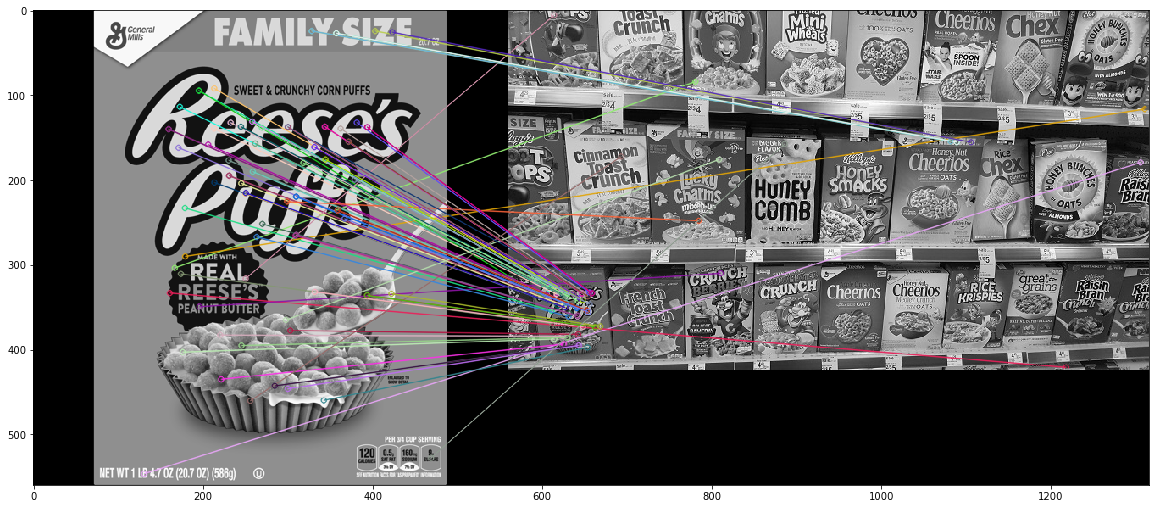

In [54]:
display(sift_matches)

*FLANN BASED MATCHER*

In [56]:
sift = cv2.xfeatures2d.SIFT_create()

In [58]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2= sift.detectAndCompute(cereals,None)

In [63]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [66]:
flann = cv2.FlannBasedMatcher(index_params,search_params)


In [69]:
matches = flann.knnMatch(des1,des2,k=2)

In [70]:
good=[]

In [73]:
for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

In [80]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

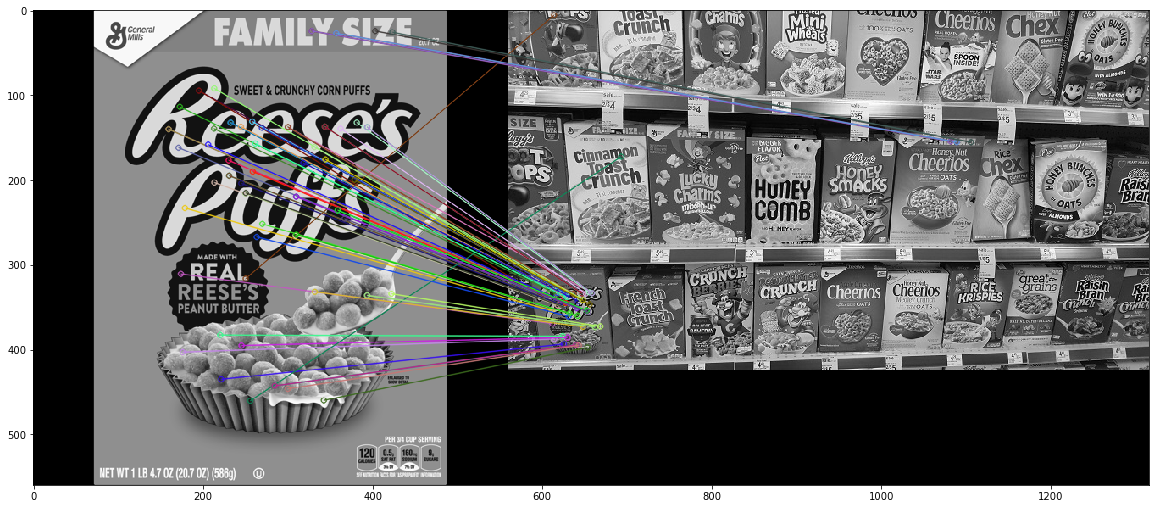

In [81]:
display(flann_matches)

In [82]:
sift = cv2.xfeatures2d.SIFT_create()

In [83]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2= sift.detectAndCompute(cereals,None)

In [84]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [85]:
flann = cv2.FlannBasedMatcher(index_params,search_params)


In [86]:
matches = flann.knnMatch(des1,des2,k=2)

In [89]:
matchesMask = [[0,0] for i in range(len(matches))]

In [90]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance<0.7*match2.distance:
        matchesMask[i]= [1,0]

In [97]:
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask = matchesMask,flags =0)

In [98]:
flann_matches1 = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

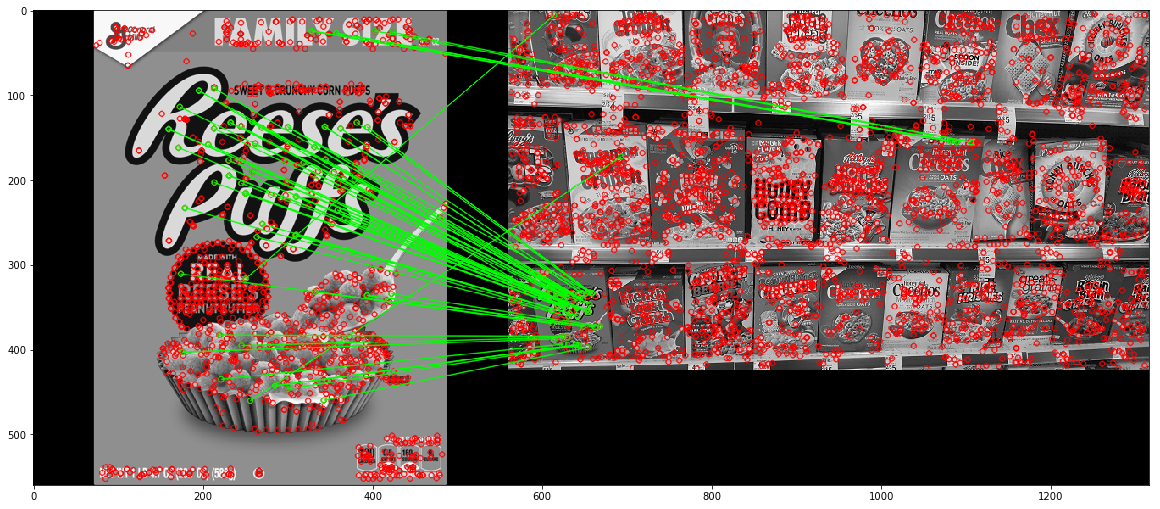

In [99]:
display(flann_matches1)